In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import random


In [2]:
def make_preferential_degree_model(beta, n):
  G = nx.Graph()
  G.add_node(0)
  for node in range(1, n):
    probs = []
    for degree in [G.degree(n) for n in G.nodes()]:
      prob = beta / (2 * degree + beta)
      probs.append(prob)
    
    probs = np.array(probs)
    probs = probs / probs.sum()

    chosen_node = np.random.choice(list(G.nodes()), p=probs)
    G.add_edge(node, chosen_node)

  return G

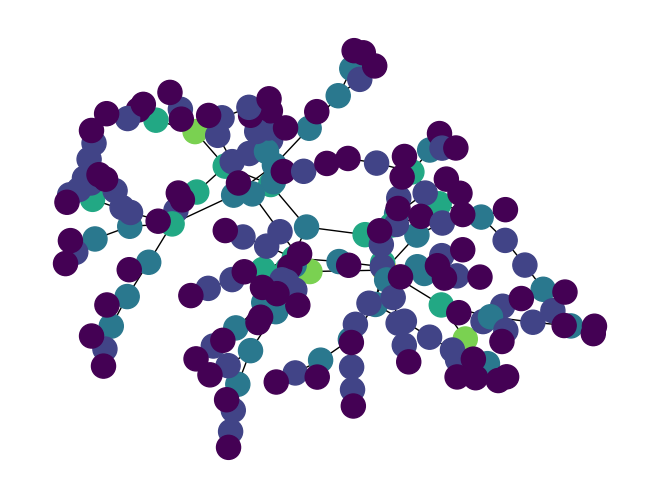

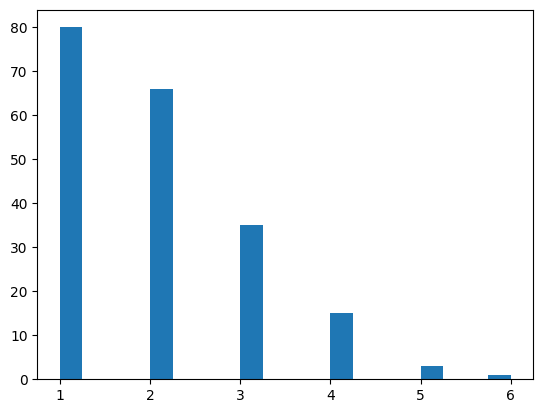

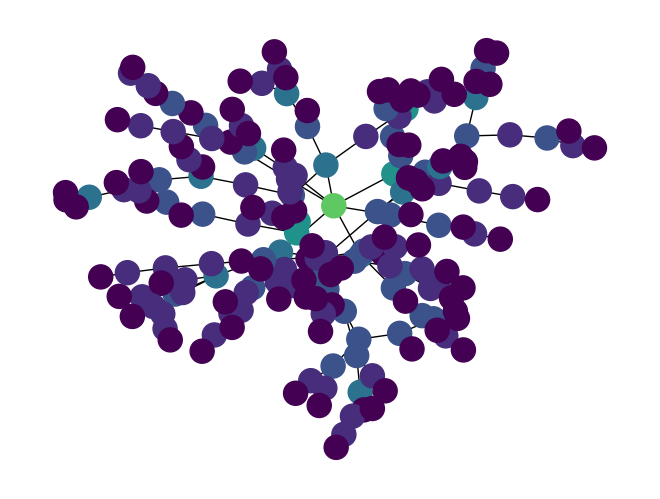

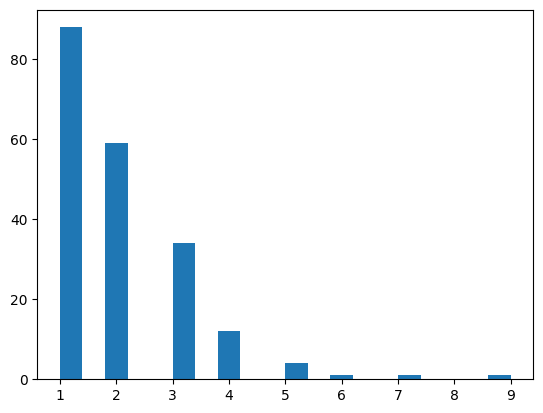

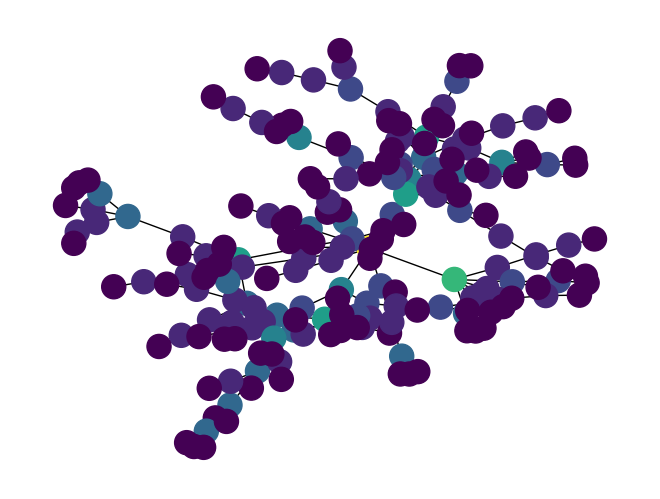

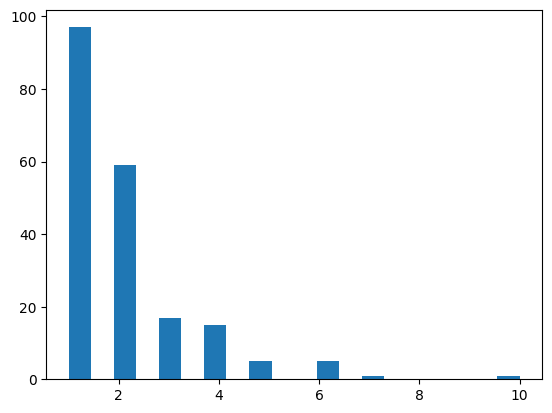

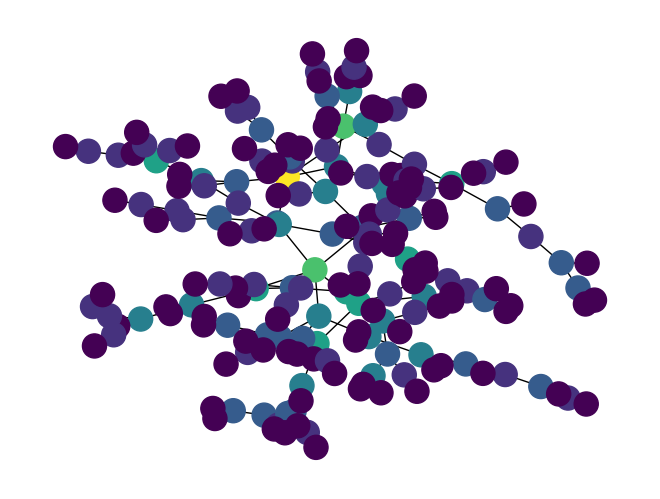

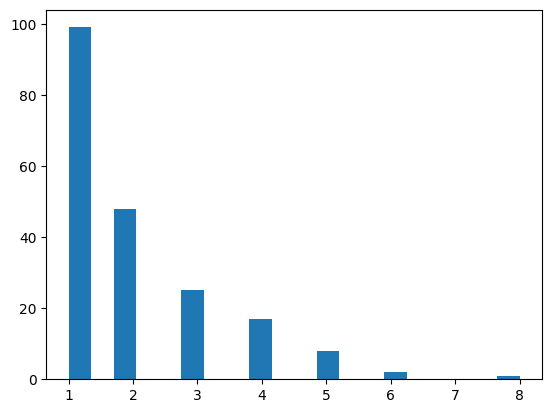

In [3]:
for beta in [1, 50, 100, 200]:
  G = make_preferential_degree_model(beta, 200)
  degrees = [G.degree(n) for n in G.nodes()]
  max_degree = max(degrees)
  min_degree = min(degrees)
  degree_range = max_degree - min_degree
  colors = [(degree - min_degree) / degree_range for degree in degrees]
  plt.figure()
  nx.draw(G,node_color=colors,)
  plt.figure()
  plt.hist(degrees, bins=20)

In [4]:
def make_preferential_degree_model_with_degree_centrality(beta, n):
  G = nx.Graph()
  G.add_edge(0,1)
  G.add_edge(0,2)
  for node in range(2, n):
    probs = []
    average_centrality = np.mean(list(dict(nx.degree_centrality(G)).values()))
    for degree in [G.degree(n) for n in G.nodes()]:
      prob = beta / (2 * degree + beta) * average_centrality
      probs.append(prob)
    
    probs = np.array(probs)
    probs = probs / probs.sum()

    chosen_node = np.random.choice(list(G.nodes()), p=probs)
    G.add_edge(node, chosen_node)

  return G

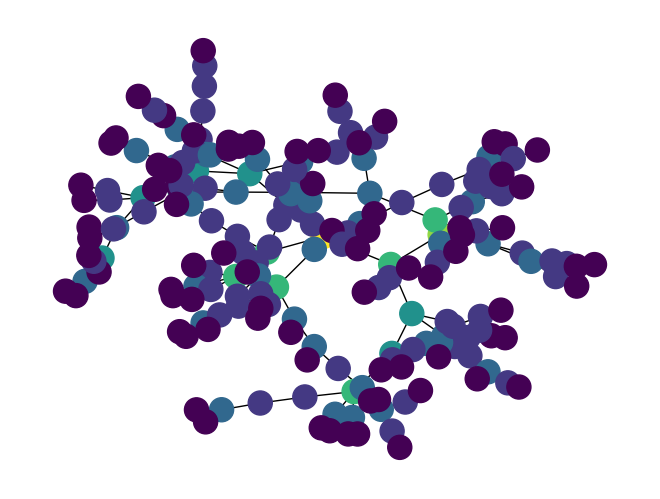

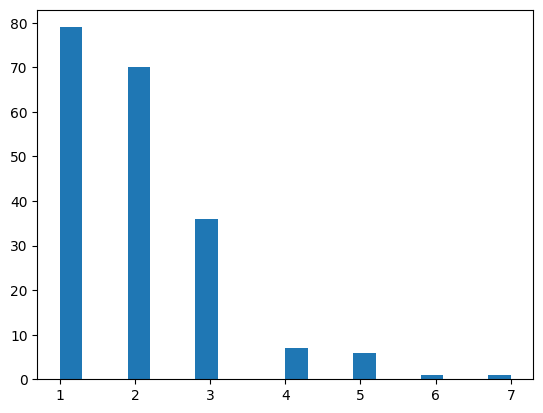

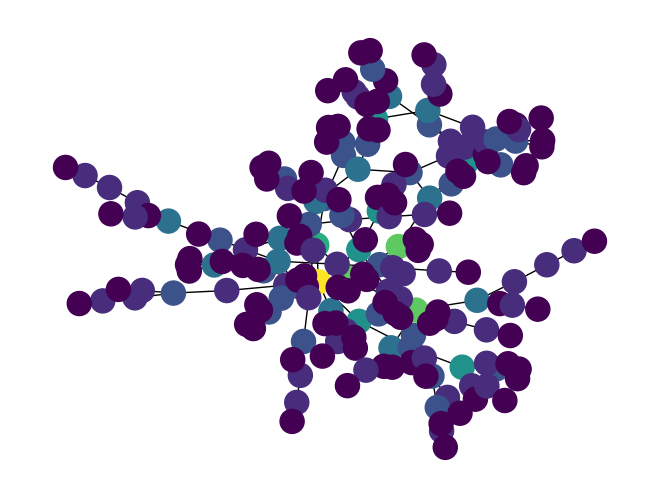

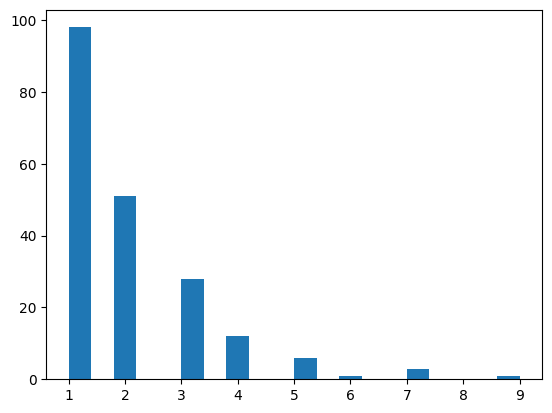

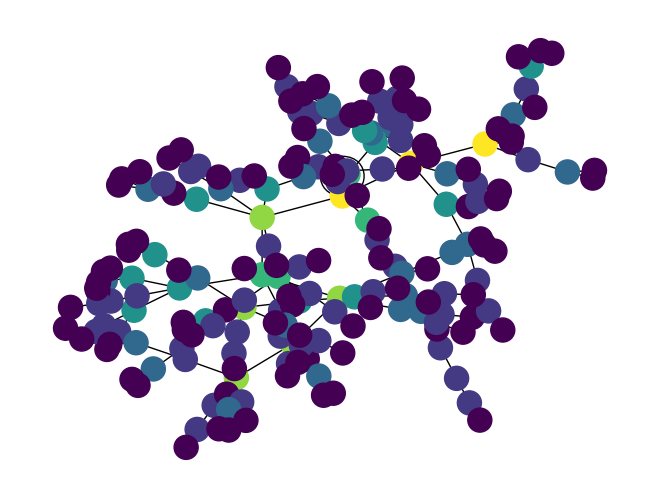

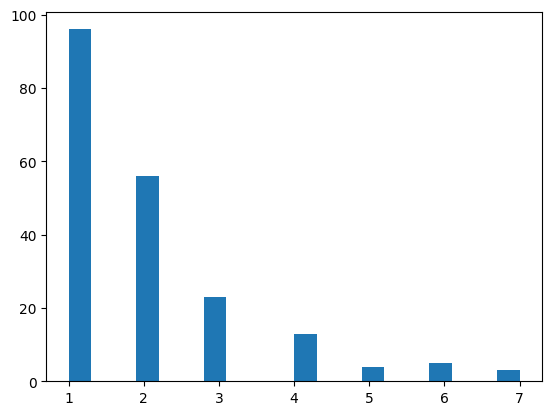

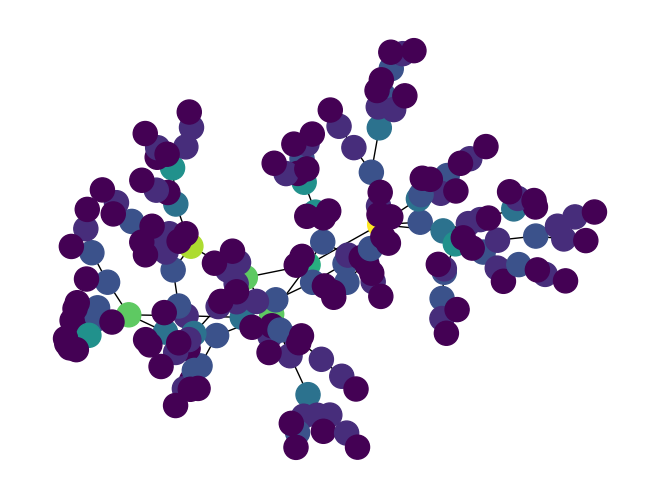

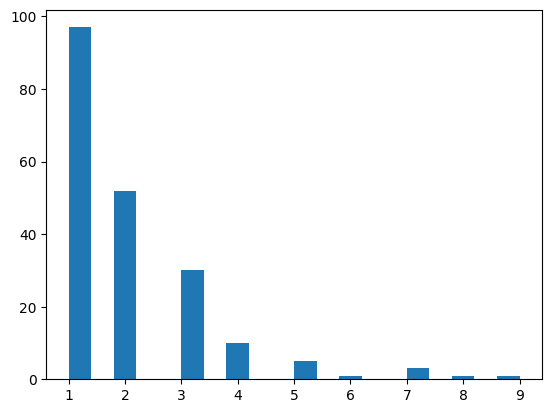

In [5]:
for beta in [1, 50, 100, 200]:
  G = make_preferential_degree_model_with_degree_centrality(beta, 200)
  degrees = [G.degree(n) for n in G.nodes()]
  max_degree = max(degrees)
  min_degree = min(degrees)
  degree_range = max_degree - min_degree
  colors = [(degree - min_degree) / degree_range for degree in degrees]
  plt.figure()
  nx.draw(G,node_color=colors,)
  plt.figure()
  plt.hist(degrees, bins=20)

In [6]:
def make_preferential_degree_model_with_clustering(beta, n):
  G = nx.Graph()
  G.add_edge(0,1)
  G.add_edge(0,2)
  for node in range(2, n):
    probs = []
    average_clustering = np.mean(list(dict(nx.clustering(G)).values())) + 1e-10
    for degree in [G.degree(n) for n in G.nodes()]:
      prob = beta / (2 * degree + beta) * average_clustering
      probs.append(prob)
    
    probs = np.array(probs)
    probs = probs / probs.sum()

    chosen_node = np.random.choice(list(G.nodes()), p=probs)
    G.add_edge(node, chosen_node)

  return G

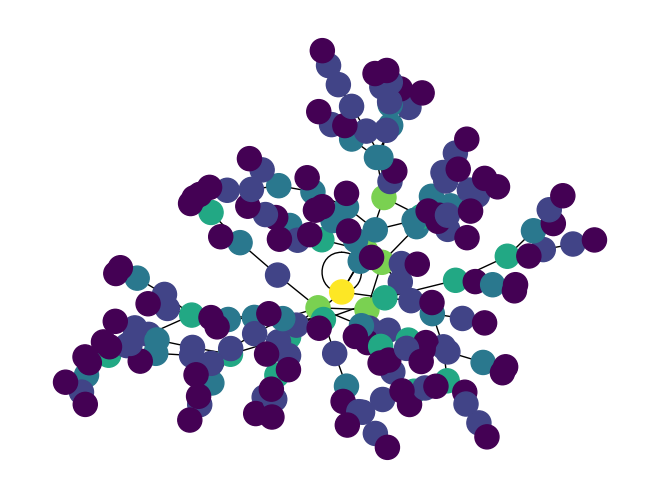

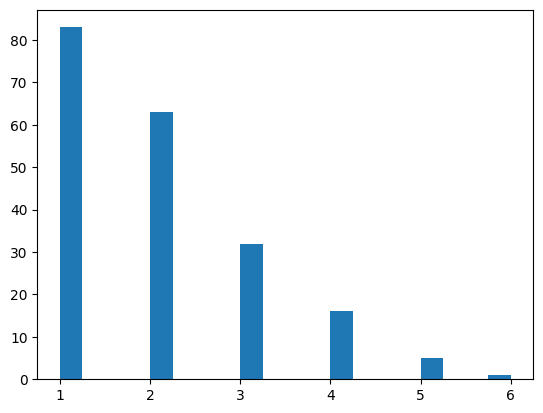

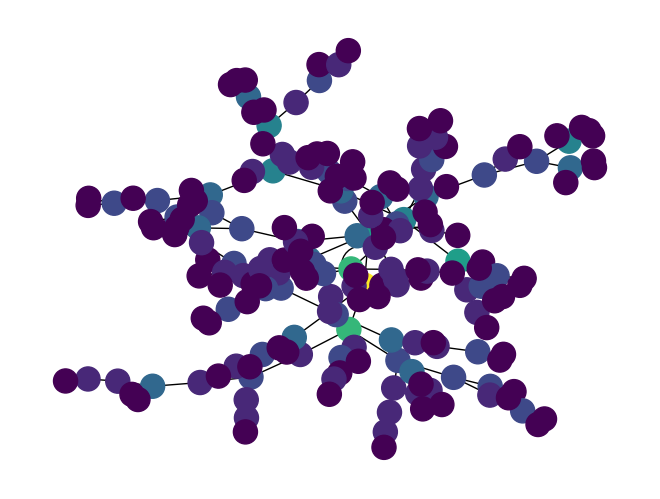

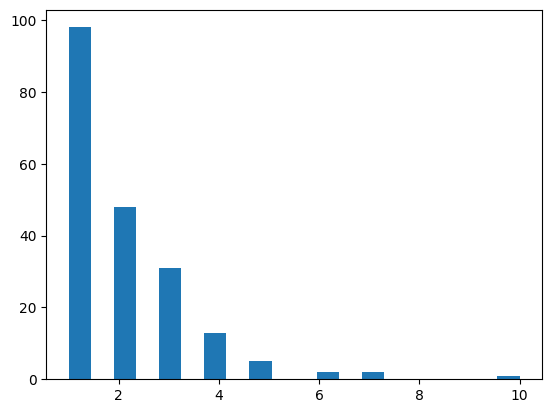

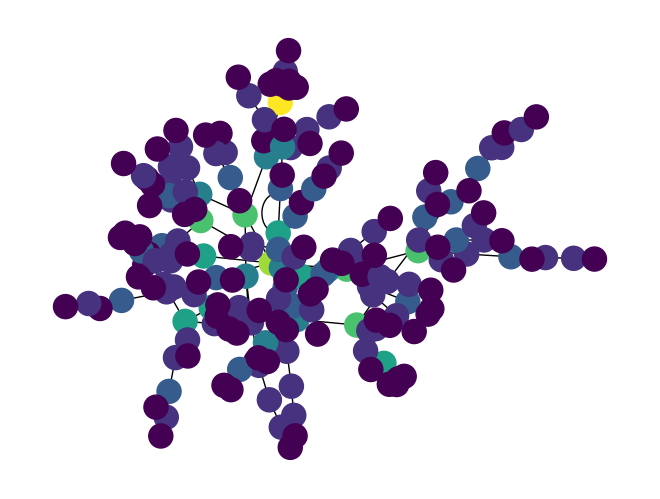

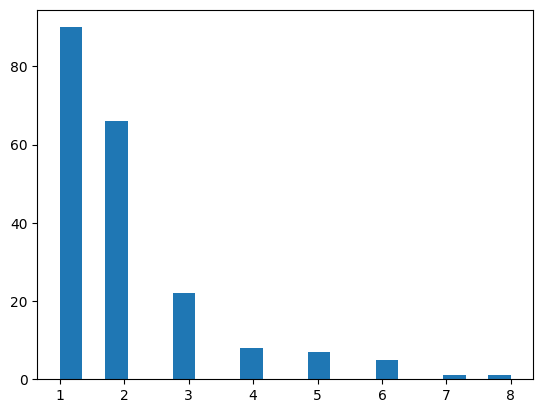

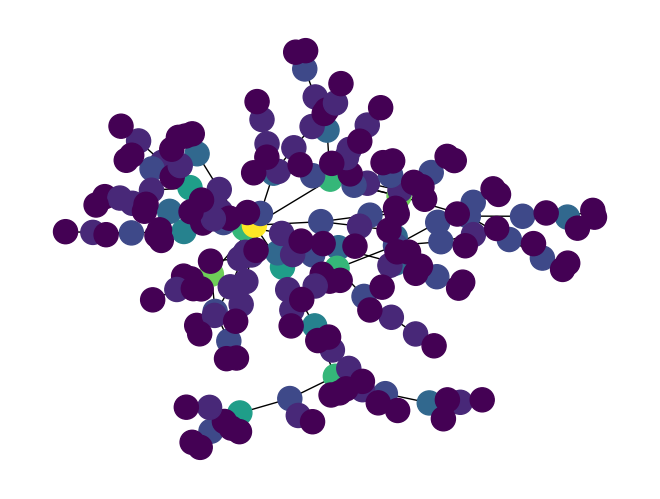

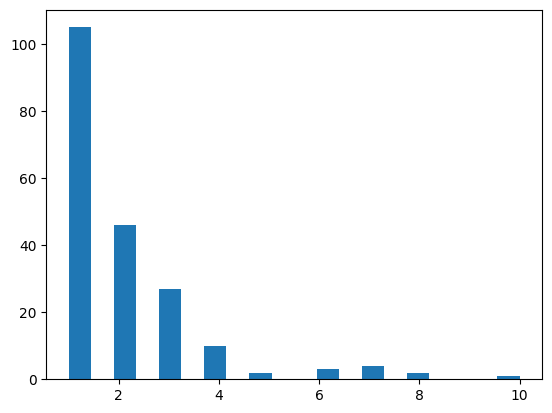

In [7]:
for beta in [1, 50, 100, 200]:
  G = make_preferential_degree_model_with_clustering(beta, 200)
  degrees = [G.degree(n) for n in G.nodes()]
  max_degree = max(degrees)
  min_degree = min(degrees)
  degree_range = max_degree - min_degree
  colors = [(degree - min_degree) / degree_range for degree in degrees]
  plt.figure()
  nx.draw(G,node_color=colors,)
  plt.figure()
  plt.hist(degrees, bins=20)

In [8]:
def make_preferential_degree_model_with_clustering_and_degree_centrality(beta, n):
  G = nx.Graph()
  G.add_edge(0,1)
  G.add_edge(0,2)
  for node in range(2, n):
    probs = []
    average_clustering = np.mean(list(dict(nx.clustering(G)).values())) + 1e-10
    average_centrality = np.mean(list(dict(nx.degree_centrality(G)).values()))
    for degree in [G.degree(n) for n in G.nodes()]:
      prob = beta / (2 * degree + beta) * average_clustering * average_centrality
      probs.append(prob)
    
    probs = np.array(probs)
    probs = probs / probs.sum()

    chosen_node = np.random.choice(list(G.nodes()), p=probs)
    G.add_edge(node, chosen_node)

  return G

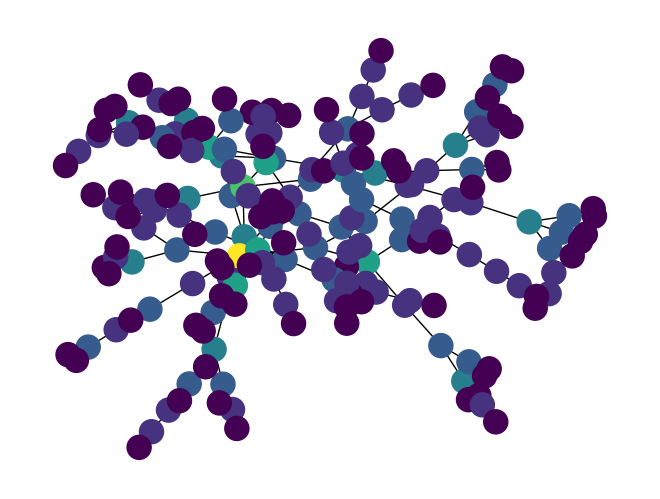

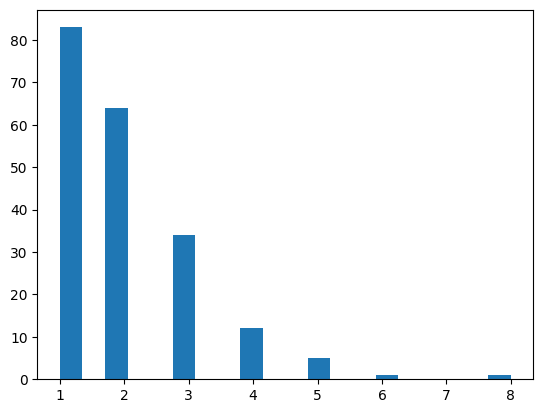

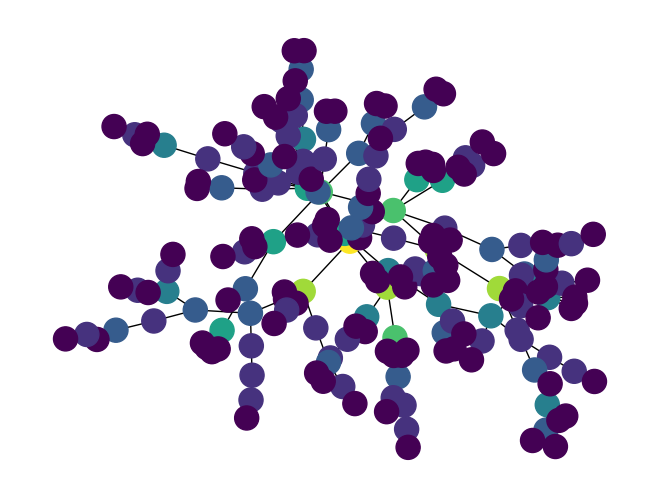

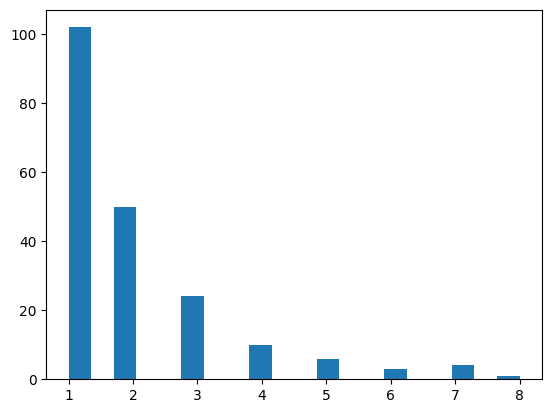

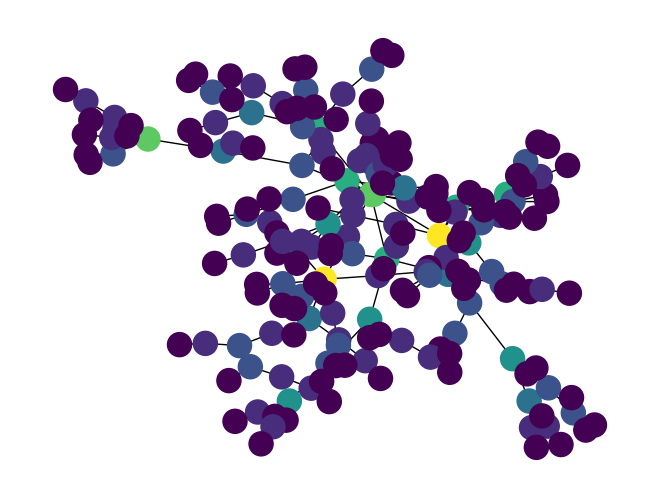

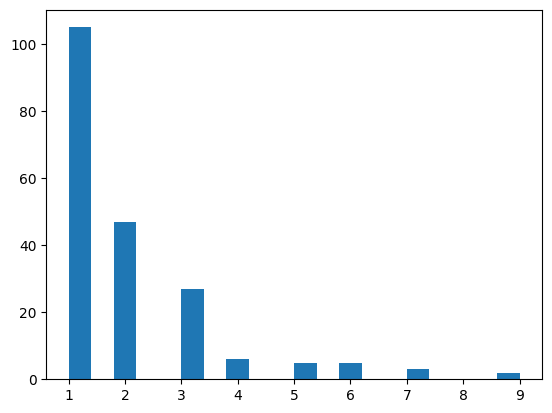

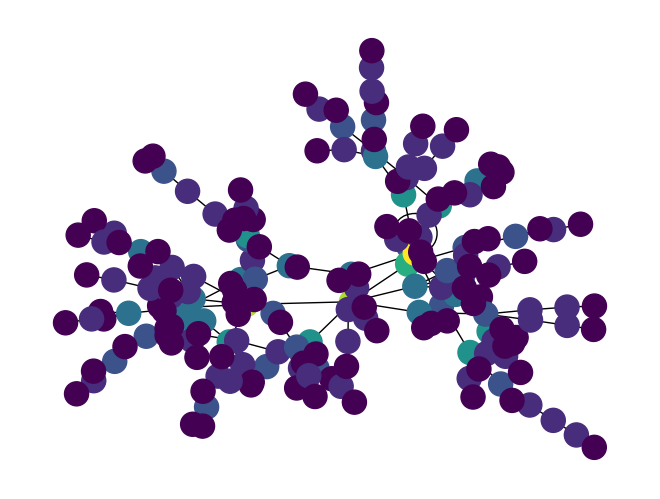

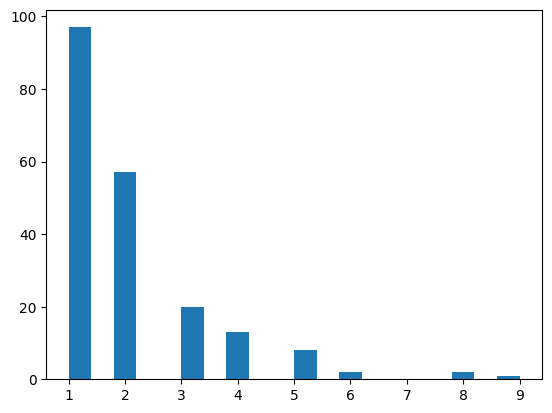

In [9]:
for beta in [1, 50, 100, 200]:
  G = make_preferential_degree_model_with_clustering_and_degree_centrality(beta, 200)
  degrees = [G.degree(n) for n in G.nodes()]
  max_degree = max(degrees)
  min_degree = min(degrees)
  degree_range = max_degree - min_degree
  colors = [(degree - min_degree) / degree_range for degree in degrees]
  plt.figure()
  nx.draw(G,node_color=colors,)
  plt.figure()
  plt.hist(degrees, bins=20)